#Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

#Importing the dataset

In [ ]:
dataset=pd.read_excel('Bike_Price_Prediction.xlsx')

#Dataset

In [ ]:
from google.colab import data_table
data_table.DataTable(dataset)

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000
...,...,...,...,...,...,...,...,...,...,...
303,304,Bgauss,Bgauss B8,2017,3.0,Boxer,Petrol,185CC,19 Litres,81916
304,305,Bgauss,Bgauss Radiator,2017,3.0,Boxer,Petrol,205CC,20 Litres,82666
305,306,Bgauss,Bgauss Razor,2017,3.0,Boxer,Petrol,185CC,21 Litres,83416
306,307,Bgauss,Bgauss Flash,2017,3.0,Boxer,Petrol,205CC,22 Litres,84166


In [ ]:
dataset

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000
...,...,...,...,...,...,...,...,...,...,...
303,304,Bgauss,Bgauss B8,2017,3.0,Boxer,Petrol,185CC,19 Litres,81916
304,305,Bgauss,Bgauss Radiator,2017,3.0,Boxer,Petrol,205CC,20 Litres,82666
305,306,Bgauss,Bgauss Razor,2017,3.0,Boxer,Petrol,185CC,21 Litres,83416
306,307,Bgauss,Bgauss Flash,2017,3.0,Boxer,Petrol,205CC,22 Litres,84166


In [ ]:
dataset.shape

(308, 10)

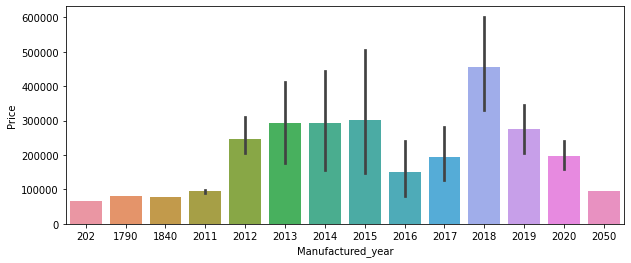

In [ ]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Manufactured_year", y = "Price", ax=ax, data=dataset)

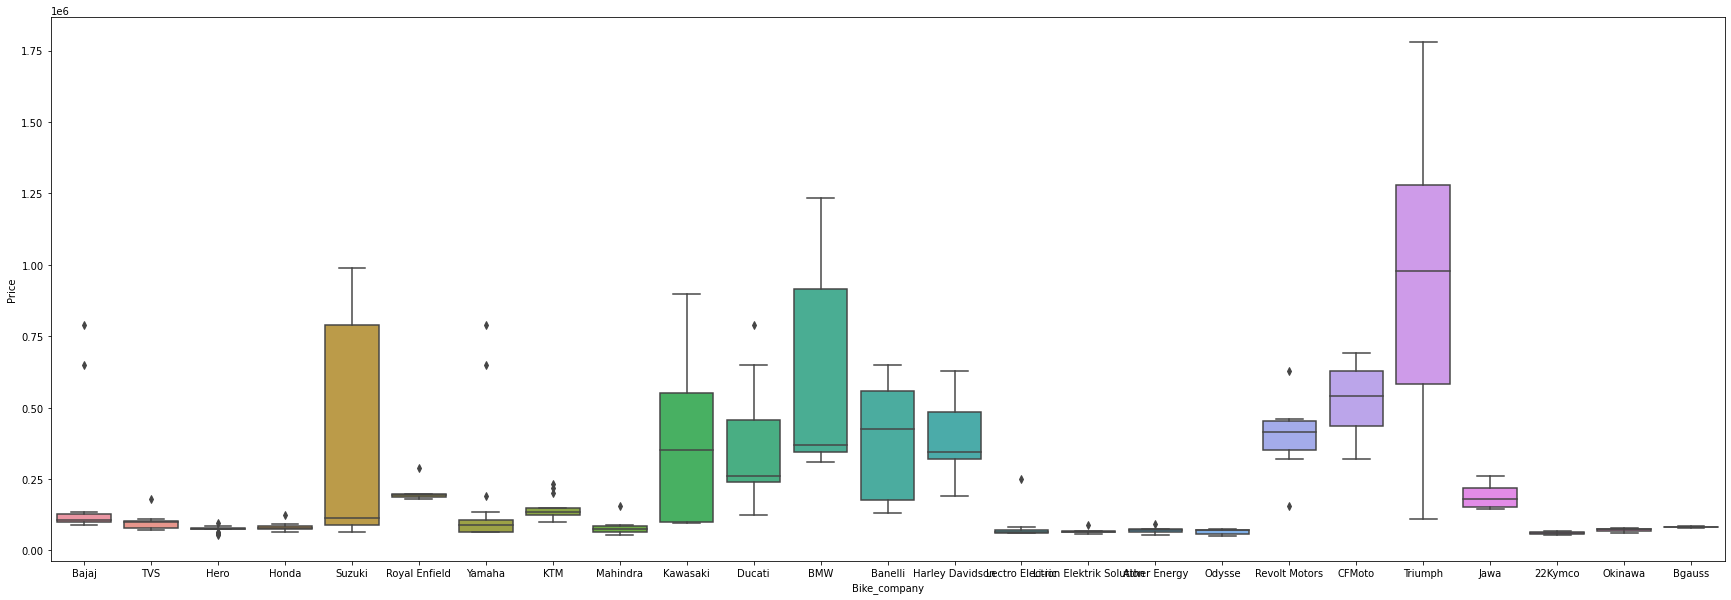

In [ ]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = "Bike_company", y = "Price", ax=ax, data=dataset)

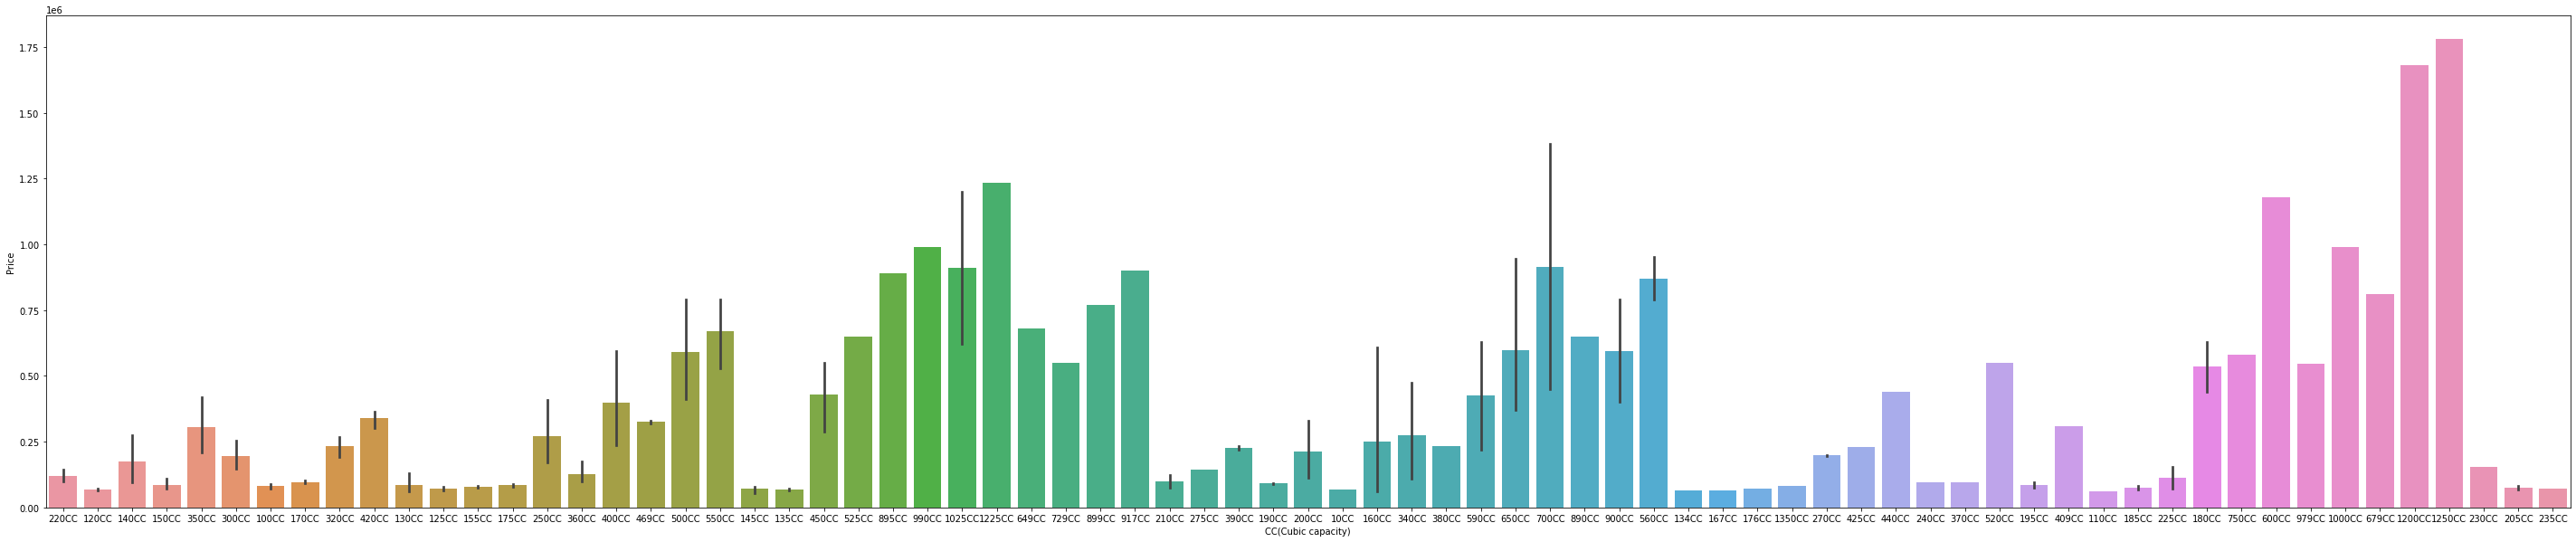

In [ ]:
fig_dims = (50, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "CC(Cubic capacity)", y = "Price", ax=ax, data=dataset)

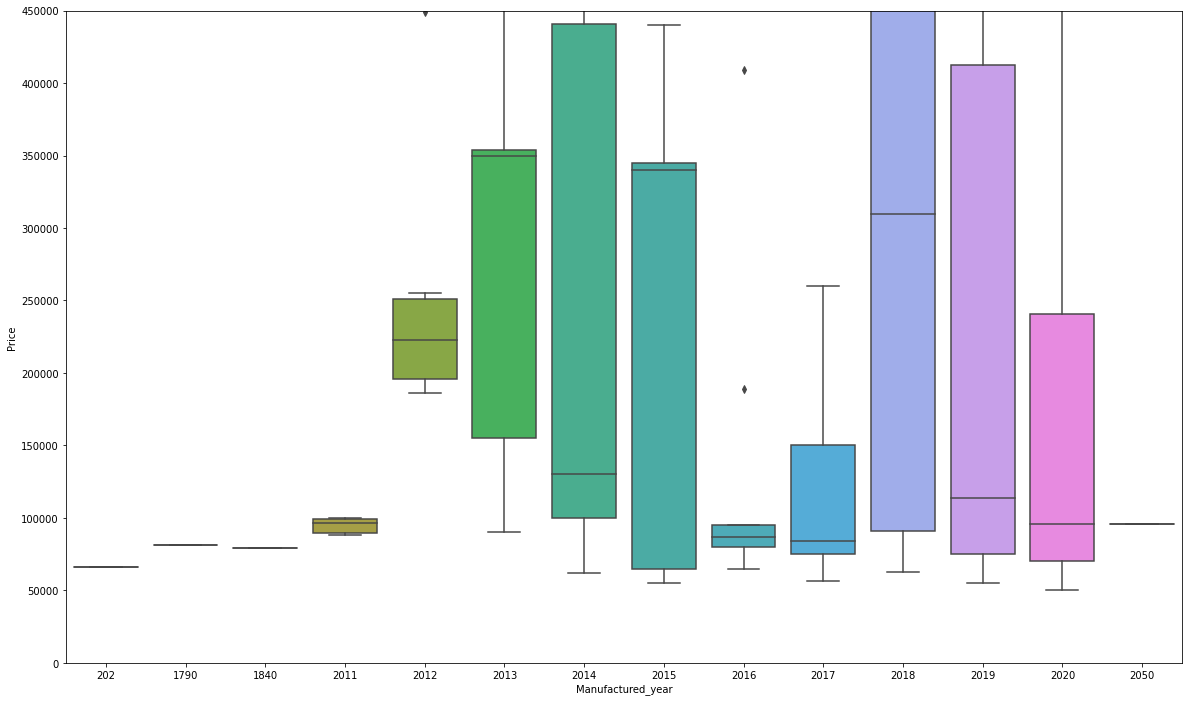

In [ ]:
data = pd.concat([dataset['Price'], dataset['Manufactured_year']], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x='Manufactured_year', y="Price", data=data)
fig.axis(ymin=0, ymax=450000);

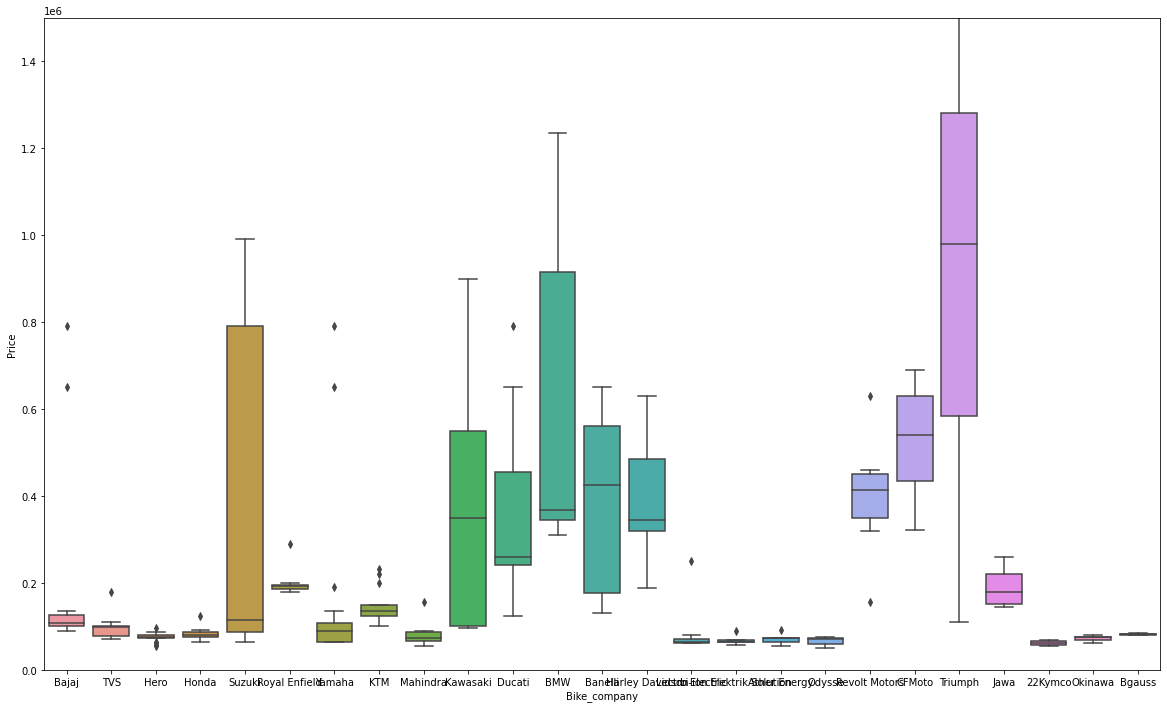

In [ ]:
data = pd.concat([dataset['Price'], dataset['Bike_company']], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x='Bike_company', y="Price", data=data)
fig.axis(ymin=0, ymax=100000);

<BarContainer object of 308 artists>

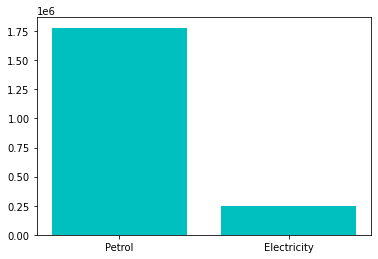

In [ ]:
plt.bar(dataset["Fuel_type"],dataset["Price"],color=["c","c"])

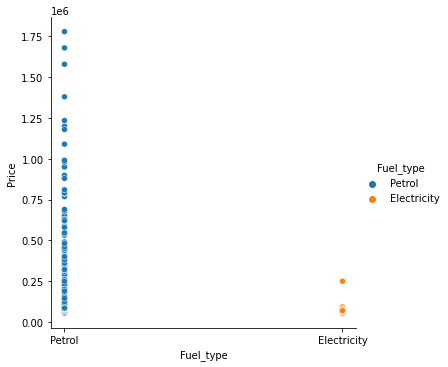

In [ ]:
sns.relplot(x='Fuel_type',y='Price',data=dataset,hue='Fuel_type')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    int64  
 2   Bike_model          308 non-null    int64  
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     306 non-null    float64
 5   Engine_type         308 non-null    int64  
 6   Fuel_type           308 non-null    int64  
 7   CC(Cubic capacity)  308 non-null    int64  
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 24.2+ KB


#Encoding the catagorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
#from sklearn.compose import ColumnTransformer

le=LabelEncoder()

dataset['Bike_company']=le.fit_transform(dataset['Bike_company'])
dataset['Bike_model']=le.fit_transform(dataset['Bike_model'])
dataset['Engine_type']=le.fit_transform(dataset['Engine_type'])
dataset['Fuel_type']=le.fit_transform(dataset['Fuel_type'])
dataset['CC(Cubic capacity)']=le.fit_transform(dataset['CC(Cubic capacity)'])


#graphical analysis


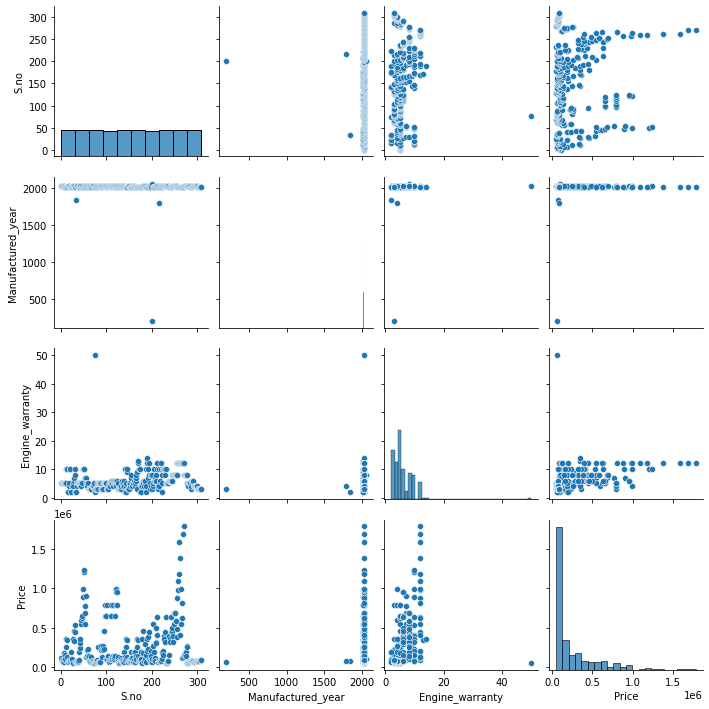

In [ ]:
sns.pairplot(dataset);

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), cmap=sns.diverging_palette(20, 220, n=200),square=True);

#Choose the dependent and independent variables

In [ ]:
x=dataset.iloc[:,1:-2].values
y=dataset.iloc[:,-1].values

#Taking care of missing data

In [ ]:
mean = math.floor(dataset['Engine_warranty'].mean())

x[:,4]=dataset['Engine_warranty'].fillna(mean)

In [ ]:
x[np.isnan(x)]=np.mean(x[~np.isnan(x)])
y[np.isnan(y)]=np.mean(y[~np.isnan(y)])

#Training the whole dataset on a Random forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x,y)
y_pred1=regressor.predict(x)
from sklearn.metrics import r2_score
r2_score(y,y_pred1) *100

93.9968347649269

In [ ]:
y_pred1=regressor.predict([[10,9,2020,5,3,1,16]])
y_pred1

array([89334.16])

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)
y_pred2=regressor.predict(x)
from sklearn.metrics import r2_score
r2_score(y,y_pred2) *100

99.98391831220246

In [ ]:
y_pred2=regressor.predict([[3,18,2020,5,4,1,30]])
y_pred2

array([114000.])